In [1]:
import numpy as np
import random

from matplotlib import pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

from Classifiers import *
from utils import *

In [2]:
train, labels, test = load_from_folders('data/att/')

# Normalize because why not
X_mean, X_std = train.mean(), train.std()
train_norm = (train - X_mean)/X_std
test_norm = (test - X_mean)/X_std

# Normalize, but depthwise
X_mean2, X_std2 = train.mean(axis=0), train.std(axis=0)
train_norm2 = (train - X_mean2)/X_std2
test_norm2 = (test - X_mean2)/X_std2

In [18]:
scale_clf = ScaleClassifier(scales=[4])       #norm2
rp_clf = RandomPointsClassifier(n_points=950) #norm2
dct_clf = DCTClassifier(size=5)               #norm2
dft_clf = DFTClassifier(clipped=False)
hist_clf = HistogramClassifier(size=7)
grad_clf = GradientClassifier()

In [4]:
# Save images to make gif

ims = []
fig = plt.figure(figsize=(10,10))

for i, img in enumerate(train):
#for i, img in enumerate(train[:1]):
    label = labels[i]
    
    fig.add_subplot(3,3, 1+3)
    
    pred = classify(scale_clf, train_norm2[i], test_norm2)
    if label==pred:
        plt.imshow(test[pred], cmap="gray")
    else:
        plt.imshow(test[pred], cmap="hot")
    plt.title("Scales")
    
    fig.add_subplot(3,3, 2+3)
    pred = classify(rp_clf, train_norm[i], test_norm)
    if label==pred:
        plt.imshow(test[pred], cmap="gray")
    else:
        plt.imshow(test[pred], cmap="hot")
    plt.title("Random points")
       
    fig.add_subplot(3,3, 3+3)
    pred = classify(dct_clf, train_norm2[i], test_norm2)
    if label==pred:
        plt.imshow(test[pred], cmap="gray")
    else:
        plt.imshow(test[pred], cmap="hot")
    plt.title("DCT")
       
    fig.add_subplot(3,3, 4+3)
    pred = classify(dft_clf, train[i], test)
    if label==pred:
        plt.imshow(test[pred], cmap="gray")
    else:
        plt.imshow(test[pred], cmap="hot")
    plt.title("DFT")
    
    fig.add_subplot(3,3, 5+3)
    pred = classify(hist_clf, train[i], test)
    if label==pred:
        plt.imshow(test[pred], cmap="gray")
    else:
        plt.imshow(test[pred], cmap="hot")
    plt.title("Histogram")
    
    fig.add_subplot(3,3, 6+3)
    pred = classify(grad_clf, train[i], test)
    if label==pred:
        plt.imshow(test[pred], cmap="gray")
    else:
        plt.imshow(test[pred], cmap="hot")
    plt.title("Gradient")
    
    fig.add_subplot(3,3, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Input")
    
    fig.canvas.draw()
    X = np.array(fig.canvas.renderer._renderer)
    ims.append(X)
    
    fig.clear()

<Figure size 720x720 with 0 Axes>

In [ ]:
## Backup func
#fig = plt.figure(figsize=(12,12))

#def update(frame):
#    im = plt.imshow(ims[frame % len(ims)])
#    return im,

#ani = animation.FuncAnimation(fig, update, frames=range(90), blit=True,
#                                repeat_delay=1000)

#from IPython.display import HTML
#HTML(ani.to_html5_video())

In [ ]:
# Install ImageMagick
#!apt-get -y install imagemagick

# Save gif
#ani.save('temp/animation.gif', writer='imagemagick', fps=1)

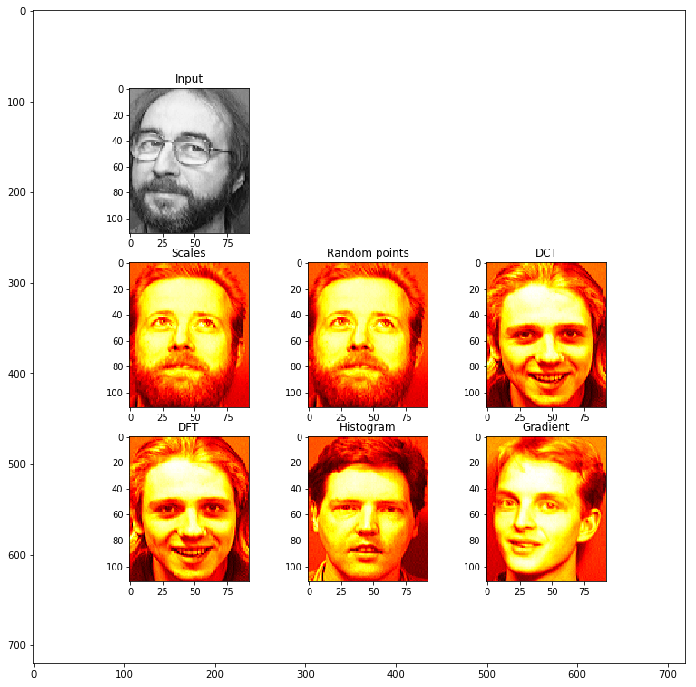

In [5]:
fig = plt.figure(figsize=(12,12))

imgs = [[plt.imshow(x)] for x in ims]

ani = animation.ArtistAnimation(fig, imgs, interval=900, blit=True,
                                repeat_delay=1000)

from IPython.display import HTML
HTML(ani.to_html5_video())

In [13]:
def test_on_batches(clf, train, test, batch_size, voting='soft'):
    n_classes = len(test)
    imgs_per_class = len(train)//n_classes
    
    cur_train = []
    cur_labels = []
    for c in range(n_classes):
        for i in range(imgs_per_class - batch_size + 1):
            k = i + c*imgs_per_class
            cur_train.append(train[k:k+batch_size])
            cur_labels.append(labels[k])
    cur_train = np.array(cur_train)

    pred = list(map(lambda imgs: classify_many(clf, imgs, test, vote=voting), cur_train))
    acc = sum(np.array(pred)==np.array(cur_labels))/len(cur_train)
    return acc

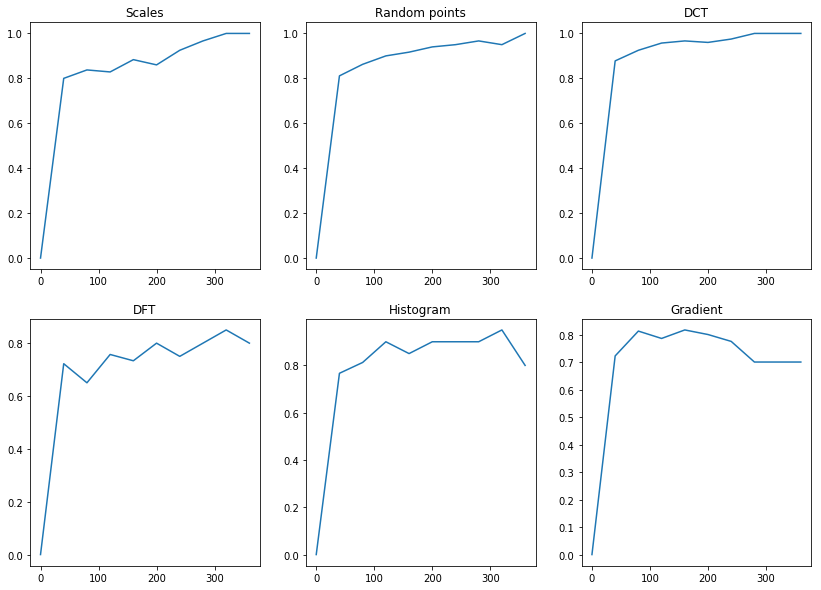

Зависимость от числа тестовых изображений


In [37]:
clfs = [scale_clf,rp_clf,dct_clf,dft_clf,hist_clf,grad_clf]
imgs_per_class = 9
x_points = [i*40 for i in range(10)]

fig = plt.figure(figsize=(14,10))

histories = []

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(scale_clf, train_norm2, test_norm2, batch_size, voting='soft')
    history.append(acc)
histories.append(history)
fig.add_subplot(2,3, 1)
plt.plot(x_points, history)
plt.title("Scales")

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(rp_clf, train_norm, test_norm, batch_size, voting='soft')
    history.append(acc)
histories.append(history)
fig.add_subplot(2,3, 2)
plt.plot(x_points, history)
plt.title("Random points")

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(dct_clf, train_norm2, test_norm2, batch_size, voting='soft')
    history.append(acc)
histories.append(history)
fig.add_subplot(2,3, 3)
plt.plot(x_points, history)
plt.title("DCT")

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(dft_clf, train, test, batch_size, voting='hard')
    history.append(acc)
histories.append(history)
fig.add_subplot(2,3, 4)
plt.plot(x_points, history)
plt.title("DFT")

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(hist_clf, train, test, batch_size, voting='hard')
    history.append(acc)
histories.append(history)
fig.add_subplot(2,3, 5)
plt.plot(x_points, history)
plt.title("Histogram")

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(grad_clf, train, test, batch_size, voting='hard')
    history.append(acc)
histories.append(history)
fig.add_subplot(2,3, 6)
plt.plot(x_points, history)
plt.title("Gradient")

plt.show()
print("Зависимость от числа тестовых изображений")